<br/>
# CSIT 5800 Introduction to Big Data
### Assignment 2 - Data Prediction using Machine Learning


### Description
In this assignment, you will have an opportunity to apply machine learning techniques that you learned in the class to a problem. 

To get started on this assignment, you need to download the given dataset and read the description carefully written on this page. Please note that all implementation of your program should be done with Python.
<br/><br/>

### Intended Learning Outcomes

- Upon completion of this assignment, you should be able to:
<ol>
    <li>Demonstrate your understanding on how to do prediction using the machine learning algorithms / techniques as described in the class.</li>
    <li>Construct Python program to learn from the training data and do data prediction for the testing set.</li>
</ol>

### Required Libraries
The following libraries are required for this assignment:
<ol>
    <li>numpy - Numerical python</li>
    <li>Scipy - Scientific python</li>
    <li>Matplotlib - Python 2D plotting library</li>
    <li>Seaborn - Visualization library based on matplotlib</li>
    <li>Pandas - Python data analysis library</li>
    <li>Scikit-learn - Python Machine learning library </li>
    <li>Keras - Deep learning library</li>
</ol>

### Dataset ~ House Prices (house-train.csv and house-test.csv)

This dataset consists of sales prices of houses in Ames, Iowa.

The training dataset has 1460 instances with unique Ids, sales prices, and 79 more features.

<ul>
<li>Pricing — Monetary values, one of which is the sales price we are trying to determine<br />
Examples: SalePrice, MiscVal    
   <ul>
   <li>SalePrice — the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
   </ul>
</li> 
<li>Dates — Time based data about when it was built, remodeled or sold.<br />
Example: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
</li>
<li>Quality/Condition — There are categorical assessment of the various features of the houses, most likely from the property assessor.<br />
Example: PoolQC, SaleCondition, GarageQual, HeatingQC
</li>
<li>Property Features — Categorical collection of additional features and attributes of the building<br />
Example: Foundation, Exterior1st, BsmtFinType1, Utilities
</li>
<li>Square Footage — Area measurement of section of the building and features like porches and lot area(which is in acres)<br />
Example: TotalBsmtSF, GrLivArea, GarageArea, PoolArea, LotArea
</li>
<li>Room/Feature Count — Quantitative counts of features (versus categorical) like rooms, prime candidate for feature engineering<br />
Example: FullBath, BedroomAbvGr, Fireplaces,GarageCars
</li>
<li>Neighborhood — Information about the neighborhood, zoning and lot.<br />
Examples: MSSubClass, LandContour, Neighborhood, BldgType
</li>
</ul>

The testing dataset has 1459 instances. It does not have the feature SalePrice, but with unique Ids and the other 79 features.

You may refer to the data description for more details (data_description.txt). 

## Step 0: Installation and Importing the libraries

### Step 0.1 
We are going to use Keras package which will be using Tensorflow as backend.
Therefore, you will need to install Tensorflow and Keras first.
<br/>
<ol>
   <li>To install Tesnsorflow:
      <ul>
         <li>Start the "Anaconda Prompt" and enter the following command:<br />
         pip install --ignore-installed --upgrade tensorflow 
         </li>         
         <li>For more information on installing Tensorflow: <url>https://www.tensorflow.org/install/</url></li>
      </ul>
   </li>
   <li>To install Keras:
      <ul>
         <li>In the "Anaconda Prompt", enter the following command:<br />
         pip install keras 
         </li>
         <li>For more information on installing Keras: <url>https://keras.io/#installation</url>.</li>
      </ul>
   </li>
</ol>


### Step 0.2
To start working, you will need to import the required libraries
- Import the following libraries using import statements.
<ul>
<li>pandas (for data manipulation)</li>
<li>numpy (for multidimensional array computation)</li>
<li>seaborn and matplotlib.pyplot (both for data visualization)</li>
</ul>
​
Note: Run a code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## ------------- From Assignment 1 -------------

## Step 1: Preprocessing

### Steps for preprocessing the training data:
<ol>
<li>Importing data and exploring the features.</li>
<li>Cleaning data: Handling missing values</li>
<li><del>Creating new features and</del> dropping redundant features.</li>
<li>Transforming data.</li>
</ol>

<strong>Note 1:</strong> In this assignment, since we are focusing on learning different models, we are not considering new features yet.   
<strong>Note 2:</strong> The following code is given to you, run the code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.

In [2]:
from scipy.stats import skew

# Step 1.1 Load the training data
trainData = pd.read_csv('house-train.csv')

# Step 1.2 Handling not Really NA values
# NA means "no alley access". Use fillna function to replace those NA values with "None".
trainData["Alley"].fillna("None", inplace=True)
trainData["BsmtQual"].fillna("No", inplace=True)
trainData["BsmtCond"].fillna("No", inplace=True)
trainData["BsmtExposure"].fillna("No", inplace=True)
trainData["BsmtFinType1"].fillna("No", inplace=True)
trainData["BsmtFinType2"].fillna("No", inplace=True)
# Fence : data description says NA means "no fence"
trainData["Fence"].fillna("No", inplace=True)
# FireplaceQu : data description says NA means "no fireplace"
trainData["FireplaceQu"].fillna("No", inplace=True)
# Functional : data description says NA means typical
trainData["Functional"].fillna("Typ", inplace=True)
# GarageType etc : data description says NA for garage features is "no garage"
trainData["GarageType"].fillna("No", inplace=True)
trainData["GarageFinish"].fillna("No", inplace=True)
trainData["GarageQual"].fillna("No", inplace=True)
trainData["GarageCond"].fillna("No", inplace=True)
# PoolQC : data description says NA for pool quality is "no pool"
trainData["PoolQC"].fillna("No", inplace=True)
# MiscFeature: Miscellaneous feature not covered in other categories, NA means no miscellaneous features
trainData["MiscFeature"].fillna("No", inplace=True)

# Step 1.3 Use mean / median to impute the missing values of the feature.
ltf_mean = trainData["LotFrontage"].mean(skipna=True)
trainData["LotFrontage"].fillna(ltf_mean, inplace=True)
pa_mean = trainData["PoolArea"].mean(skipna=True)
trainData["PoolArea"].fillna(pa_mean, inplace=True)

# Step 1.4
# Use the most common value of the feature to impute the missing values. 
trainData["MasVnrType"].fillna("None", inplace=True)
trainData["MasVnrArea"].fillna("0", inplace=True)

# Step 1.5 Remove the instance with missing value on the feature 'Electical"
# Drop the instance
trainData = trainData.drop(trainData.loc[trainData['Electrical'].isnull()].index)

# Step 1.6 Remove certain features if necessary
# Drop the feature 'GarageYrBlt'
trainData = trainData.drop(['GarageYrBlt'], axis=1)

# Drop the feature 'id'
trainData = trainData.drop(['Id'], axis=1)

# Step 1.7 Change the type of MasVnrArea to float
trainData['MasVnrArea'] = trainData['MasVnrArea'].astype(float)

# Step 1.8 Normalize the numerical features
numeric_feats = trainData.dtypes[trainData.dtypes != "object"].index
skewed_feats = trainData[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
for feat in skewed_feats.index:
   trainData[feat] = np.log1p(trainData[feat])

# Step 1.9 convert categorical features into dummy/indicator features
trainData = pd.get_dummies(trainData)

# Review the first 10 rows
trainData.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
5,3.931826,4.454347,9.555064,5,5,1993,1995,0.000000,6.597146,0.000000,...,0,0,0,1,0,0,0,0,1,0
6,3.044522,4.330733,9.218804,8,5,2004,2005,5.231109,7.222566,0.000000,...,0,0,0,1,0,0,0,0,1,0
7,4.110874,4.263383,9.247925,7,6,1973,1973,5.484797,6.756932,3.496508,...,0,0,0,1,0,0,0,0,1,0
8,3.931826,3.951244,8.719481,7,5,1931,1950,0.000000,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
9,5.252273,3.931826,8.912069,5,6,1939,1950,0.000000,6.747587,0.000000,...,0,0,0,1,0,0,0,0,1,0


## ------------- Complete the following -------------

## Step 2: Preparing Training and Validation Datasets  (10 points)

### Step 2.1  Prepare training data - feature set and target set
- Build target set Y by extracting 'SalePrice' from trainData.
- Build feature set X by excluding/dropping the 'SalePrice' from trainData.

In [3]:
# Put your statements here
train_Y = trainData['SalePrice']
train_X = trainData.drop(columns = 'SalePrice')


In [4]:
print(train_X.shape, train_Y.shape)

(1459, 300) (1459,)


### Step 2.2 Split the data into training and validation datasets

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">sklearn.model_selection.train_test_split()</a> function to split the training data, feature set and target set (i.e. X and Y), into two subsets for training and validation, i.e. X_train, X_valid, Y_train, Y_valid.

<ul>
<li>Set test_size to 0.3. test_size is the proportion of the dataset to include in the test split. <li>Set random_state to 0. An integer value is the seed used by the random number generator.</li>
</ul>

In [5]:
# Put your statements here
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(train_X, train_Y, test_size=0.3, random_state=0)


### Step 2.3
Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.DataFrame.shape</a> function to view the dimensionality of the training and validation datasets of features and targets

In [6]:
# Put your statements here
print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)


(1021, 300) (438, 300) (1021,) (438,)


## Step 3: Training the Regression model using Sklearn  (10 points)

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model.LinearRegression</a> to build a linear gression model.

### Step 3.1 
Import the LinearRegression from sklearn.linear_model.

In [7]:
# Put your statements here
from sklearn.linear_model import LinearRegression


### Step 3.2 
Build the linear regression model by:
<ol>
<li>Initialize a Linear Regression model by LinearRegression() function.</li>
<li>Call fit() function to train the linear regression model using the training feature data (i.e. X_train).</li>
<li>Predict the target values for the validation feature data (i.e. X_valid) using the predict() function.
</ol>

In [8]:
# Put your statements here
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
valid_predict = linear_model.predict(X_valid)


### Step 3.3
Using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">sklearn.metrics.mean_squared_error</a> to
evaluate the predicted target values by computing "Root Mean Squred Error (RMSE)":
<ol>
   <li>Import mean_squared_error from sklearn.metrics module.</li>
   <li>Compute the mean squared error (MSE) by using mean_squared_error() function on the validation target data (i.e. Y_valid) and the predicted target values.</li>
   <li>Compute the RMSE by otaining the square-root of the MSE using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html">numpy.sqrt()</a> function.</li>
   <li>Print the RMSE</li>
</ol>

In [9]:
# Put your statements here
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(valid_predict, Y_valid)
rmse = np.sqrt(mse)
print(rmse)


0.6047737280536616


### Step 3.4
Explore the validation target values vs the predicted target values using scatter function 
(<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html">matplotlib.pyplot.scatter</a>) of matplotlib library.

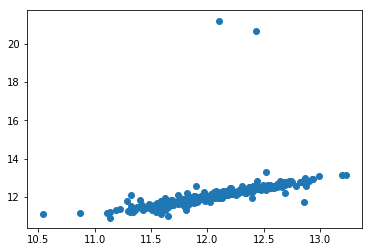

In [10]:
# Put your statements here
plt.scatter(x=Y_valid, y=valid_predict)


<span style="color:red">What is your observation?</span> (Write your observation here.)

Except some of the possible outliers are not match, most of the point in the validation sets can be predicted properly by regression model.

## Step 4: Training the Decision Tree model using  Sklearn (10 points)

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">sklearn.tree.DecisionTreeRegressor</a> to build a Decision Tree model for Regression Problem.

(Reference:<a href="https://scikit-learn.org/stable/modules/tree.html#tree">Decision Tree User Guide from Scikit-learn</a>)

### Step 4.1 
Import the DecisionTreeRegressor from sklearn.tree.

In [11]:
# Put your statements here
from sklearn.tree import DecisionTreeRegressor


### Step 4.2 
Build the Decision Tree model by:
<ol>
<li>Initialize a Decision Tree model by DecisionTreeRegressor() function.</li>
<li>Call fit() function to train the model using the training feature data (i.e. X_train).</li>
<li>Predict the target values for the validation feature data (i.e. X_valid) using the predict() function.
</ol>

In [12]:
# Put your statements here
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
tree_valid_predict = tree_model.predict(X_valid)


### Step 4.3
Using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">sklearn.metrics.mean_squared_error</a> to
evaluate the predicted target values by computing "Root Mean Squred Error (RMSE)":
<ol>
   <li>Import mean_squared_error from sklearn.metrics module,</li>
   <li>Compute the mean squared error (MSE) by using mean_squared_error() function on the validation target data (i.e. Y_valid) and the predicted target values.</li>
   <li>Compute the RMSE by otaining the square-root of the MSE using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html">numpy.sqrt()</a> function.</li>
   <li>Print the RMSE.</li>
</ol>

In [13]:
# Put your statements here
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(tree_valid_predict, Y_valid)
rmse = np.sqrt(mse)
print(rmse)


0.20721271575635983


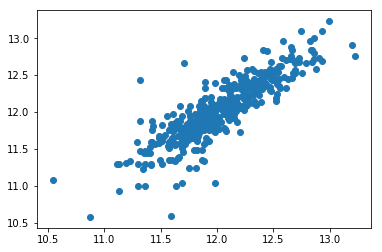

In [14]:
plt.scatter(x=Y_valid, y=tree_valid_predict)

## Step 5 -- Standardization and Rescaling (10 points)

Rescaling and Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

(Reference: <a href="https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling">here</a>)

Performs the rescaling by:
<ol>
<li>Import the MinMaxScaler from sklearn.preprocessing module.</li>
<li>Initializing a MinMaxScaler by using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">sklearn.preprocessing.MinMaxScaler</a> function, which transforms the numerical features by scaling each feature to a given range of [0, 1], i.e. between zero to one.</li>
<li>Compute the minimum and maximum to be used for later scalingby using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit">sklearn.preprocessing.MinMaxScaler.fit()</a> function.</li>
<li>Transform the data using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.transform">sklearn.preprocessing.MinMaxScaler.transform()</a> function.</li>
<li>The tranformed data is an numpy array. Convert it into a pandas.DataFrame using
pandas.DataFrame() function with pandas.DataFrame.columns.</li>
<li>Using the pandas.DataFrame.head() function to preview the data.</li>
</ol>

In [44]:
# Put your statements here
from sklearn.preprocessing import MinMaxScaler
all_feature_scaler = MinMaxScaler()
all_feature_scaler.fit(train_X)
sca_all_feature = all_feature_scaler.transform(train_X)
sca_all_feature = pd.DataFrame(sca_all_feature)

train_scaler = MinMaxScaler()
train_scaler.fit(X_train)
sca_train_X = train_scaler.transform(X_train)
sca_train_X = pd.DataFrame(sca_train_X)

valid_scaler = MinMaxScaler()
valid_scaler.fit(X_valid)
sca_valid_X = valid_scaler.transform(X_valid)
sca_valid_X = pd.DataFrame(sca_valid_X)

Review the first 10 rows of the training feature set using pandas.DataFrame.head().

In [16]:
# Put your statement here
sca_train_X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,0.395769,0.342929,0.666667,0.500,0.953846,0.916667,0.000000,0.696715,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.499482,0.432954,0.666667,0.500,0.753846,0.466667,0.722749,0.759180,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.483003,0.461356,0.351706,0.555556,0.750,0.753846,0.466667,0.720770,0.618984,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.551764,0.641280,0.461253,0.555556,0.750,0.423077,0.600000,0.000000,0.745607,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.483003,0.407525,0.370465,0.555556,0.500,0.961538,0.916667,0.000000,0.609810,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.401904,0.316280,0.378613,0.555556,0.625,0.438462,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.664177,0.440738,0.396118,0.333333,0.500,0.630769,0.200000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.582589,0.441003,0.433085,0.555556,0.625,0.276923,0.733333,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.000000,0.389750,0.354161,0.333333,0.500,0.623077,0.183333,0.713258,0.787962,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,0.440738,0.380776,0.555556,0.625,0.607692,0.150000,0.000000,0.742993,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Review the first 10 rows of the standardized validation feature set using pandas.DataFrame.head().

In [17]:
# Put your statement here
sca_valid_X.head(10)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.483003,0.684664,0.438343,0.428571,0.500000,0.700730,0.305085,0.861080,0.796318,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.176408,0.405442,0.286715,0.285714,0.833333,0.481752,0.779661,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.664177,0.491783,0.333846,0.142857,0.333333,0.562044,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.664177,0.565326,0.328764,0.285714,0.333333,0.781022,0.491525,0.000000,0.908558,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.622538,0.410682,0.285714,0.666667,0.678832,0.254237,0.731014,0.892602,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.611449,0.491783,0.331864,0.285714,0.333333,0.605839,0.084746,0.000000,0.789601,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.000000,0.514934,0.342632,0.571429,0.333333,0.963504,0.932203,0.683404,0.865245,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.922605,0.061644,0.118336,0.714286,0.333333,0.927007,0.847458,0.872772,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.922605,0.000000,0.058301,0.142857,0.333333,0.715328,0.338983,0.626212,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,0.610329,0.371913,0.142857,0.500000,0.620438,0.118644,0.000000,0.751559,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Step 6: Training the Neural Network model using Keras (15 points)

### Step 6.1
Import the following libraries using import statements.
<ul>
    <li>keras (for deep learning) (Reference: <url>https://keras.io/</url>)
        <ul>
            <li>Sequential from keras.models</li>
            <li>Dense from keras.layers</li>
            <li>ModelCheckpoint from keras.callbacks</li>
        </ul>
    </li>    
</ul>
Note: Run a code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.
<br />
Note: Tensorflow and Keras have to be installed first, see <strong>Step 0.1</strong>

In [18]:
# Put your statements here
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint
from keras.utils import print_summary

Using TensorFlow backend.


### Step 6.2
- Build a neural network to learn from the given training set - trainData.
(Reference: <a href="https://faroit.github.io/keras-docs/1.0.1/getting-started/sequential-model-guide/">Here</a>)
<ol>
  <li>Initalizing a neural network using Sequential() function and name the returned object NN.</li>
  <li>Adding the input layer and the hidden layer using add function of NN and Dense function.<br/>
      Parameters of Dense function:
      <ul>
          <li>Set output_dim to 150: output_dim is the number of nodes we want to add to this layer.</li>
          <li>kernel_initializer to 'normal': kernel_initializer is the initializer for the kernel weights matrix.</li>
          <li>activation to 'relu': activation is the activation function of the node.</li>
          <li>input_dim to the number of features: input_dim refers to the number of inputs, which is only needed for the first layer.<br />
          You may use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.DataFrame.shape</a> function.
          </li>
      </ul>
  </li>
  <li>Adding the output layer using add function of NN and Dense function.<br/>
      Parameters of Dense function:
      <ul>
          <li>Set output_dim to 1: output_dim is the number of nodes we want to add to this layer.</li>
          <li>init to 'relu': init is the initialization of stochastic gradient decent.</li>
          <li>activation to 'normal': activation is the activation function of the node.</li>
      </ul>
  </li>
  <li>Prints a summary representation of our model by calling summary function of NN.</li>
</ol>

In [19]:
# Put your statements here
model = Sequential()
model.add(Dense(150, kernel_initializer='normal', activation='relu', input_dim=300))
model.add(Dense(150, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
print_summary(model)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 67,951
Trainable params: 67,951
Non-trainable params: 0
_________________________________________________________________


### Step 6.3
- Compile the neural network and start training
<ol>
  <li>Call <a href="https://keras.io/models/sequential/#compile">compile()</a> function of NN to compile the neural network<br/>
      Parameters of compile function:
      <ul>
          <li>loss to 'mean_squared_error': loss is a stochastic gradient decent depends on loss.</li>
          <li>optimizer to 'Adam': optimizer is the algorithm that we want to use to find optimal set of weights. For details about 'Adam', please visit <a href="https://arxiv.org/abs/1412.6980v8">here</a>.              
          </li>
          <li>metrics to ['mean_squared_error']: metrics is the metric(s) that we want to use to improve the performance of our neural network. In our case, accuracy is the metrics.</li>
      </ul>
  </li>
  <li>Call <a href="https://keras.io/models/sequential/#fit">fit()</a> function of NN to train the model on training data<br/>
      Parameters of fit function:
      <ul>
          <li>Set x to X: x is the numpy array of training feature data.</li>
          <li>Set y to Y: y is the numpy array of training target data.</li>
          <li>Set batch_size to 32: batch_size is the number of samples per gradient update.</li>
          <li>Set epochs to 500: epochs is the number of epochs to train the model.</li>
      </ul>
  </li>
</ol>

In [21]:
# Put your statements here
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])
model.fit(sca_train_X, Y_train, batch_size=32, epochs=500)


Instructions for updating:
Use tf.cast instead.
Epoch 1/500
1021/1021 [==============================] - 1s 501us/step - loss: 63.6788 - mean_squared_error: 63.6788
Epoch 2/500
1021/1021 [==============================] - 0s 109us/step - loss: 1.2659 - mean_squared_error: 1.2659
Epoch 3/500
1021/1021 [==============================] - 0s 87us/step - loss: 0.1415 - mean_squared_error: 0.1415
Epoch 4/500
1021/1021 [==============================] - 0s 88us/step - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 5/500
1021/1021 [==============================] - 0s 83us/step - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 6/500
1021/1021 [==============================] - 0s 90us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 7/500
1021/1021 [==============================] - 0s 88us/step - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 8/500
1021/1021 [==============================] - 0s 89us/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 9/500
1021/1021 [=============

1021/1021 [==============================] - 0s 105us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 70/500
1021/1021 [==============================] - 0s 113us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 71/500
1021/1021 [==============================] - 0s 115us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 72/500
1021/1021 [==============================] - 0s 123us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 73/500
1021/1021 [==============================] - 0s 114us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 74/500
1021/1021 [==============================] - 0s 133us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 75/500
1021/1021 [==============================] - 0s 123us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 76/500
1021/1021 [==============================] - 0s 85us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 77/500
1021/1021 [==============================] - 0s 83us/step - loss: 0.0026 

1021/1021 [==============================] - 0s 90us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 210/500
1021/1021 [==============================] - 0s 106us/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 211/500
1021/1021 [==============================] - 0s 94us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 212/500
1021/1021 [==============================] - 0s 86us/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 213/500
1021/1021 [==============================] - 0s 97us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 214/500
1021/1021 [==============================] - 0s 85us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 215/500
1021/1021 [==============================] - 0s 94us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 216/500
1021/1021 [==============================] - 0s 87us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 217/500
1021/1021 [==============================] - 0s 117us/step - loss: 0.00

1021/1021 [==============================] - 0s 97us/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 348/500
1021/1021 [==============================] - 0s 88us/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 349/500
1021/1021 [==============================] - 0s 86us/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 350/500
1021/1021 [==============================] - 0s 97us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 351/500
1021/1021 [==============================] - 0s 85us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 352/500
1021/1021 [==============================] - 0s 94us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 353/500
1021/1021 [==============================] - 0s 94us/step - loss: 0.0012 - mean_squared_error: 0.0012 
Epoch 354/500
1021/1021 [==============================] - 0s 98us/step - loss: 0.0011 - mean_squared_error: 0.0011 
Epoch 355/500
1021/1021 [==============================] - 0s 92us/step - loss: 0.00

1021/1021 [==============================] - 0s 101us/step - loss: 7.3668e-04 - mean_squared_error: 7.3668e-04
Epoch 486/500
1021/1021 [==============================] - 0s 98us/step - loss: 8.7611e-04 - mean_squared_error: 8.7611e-04
Epoch 487/500
1021/1021 [==============================] - 0s 97us/step - loss: 0.0012 - mean_squared_error: 0.0012   
Epoch 488/500
1021/1021 [==============================] - 0s 97us/step - loss: 0.0011 - mean_squared_error: 0.0011 
Epoch 489/500
1021/1021 [==============================] - 0s 101us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 490/500
1021/1021 [==============================] - 0s 103us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 491/500
1021/1021 [==============================] - 0s 98us/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 492/500
1021/1021 [==============================] - 0s 89us/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 493/500
1021/1021 [==============================] - 0s 8

### Step 6.4 
Evaluate the model with Validation dataset

<ol>
<li>Evaluate the model with the validation data using the <a href="https://keras.io/models/sequential/#evaluate">evaluate()</a> function.
The evaluate function returns the loss value and metrics values for the model in test mode.
</li>
<li>Compute the RMSE by otaining the square-root of the MSE using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html">numpy.sqrt()</a> function.</li>
<li>Print the RMSE.</li>
</ol>

In [22]:
# Put your statements here
loss, metrics = model.evaluate(sca_valid_X, Y_valid, batch_size = 32)
rmse = np.sqrt(loss)
print(rmse)

438/438 [==============================] - 0s 142us/step
0.2531560173472991


## Step 7: Predict the testing data (20 points)

### Step 7.1  Load the testing data (house-test.csv)

In [23]:
# Put your statement here
test_data = pd.read_csv('house-test.csv')


### Step 7.2: Prepare the testing data

Steps for preprocessing the testing data:
<ol>
<li>Exploring the features.</li>
<li>Cleaning data: Handling missing values</li>
<li><del>Creating new features and </del>dropping redundant features.</li>
<li>Transforming data.</li>
</ol>

You may refer to Assignment 1 and also Step 1 above for reference.
(You may add multiple cells below.)

#### Step 7.2.1
Evaluate the data quality & perform missing values assessment using isnull function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html">pandas.isnull</a>) and sum function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html">pandas.DataFrame.sum</a>) of pandas library.

In [24]:
# Put your statements here
test_data.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

#### Step 7.2.2 Handling Not Really NA Values

In [25]:
# Put your statements here
test_data["Alley"].fillna("None", inplace=True)
test_data["BsmtQual"].fillna("No", inplace=True)
test_data["BsmtCond"].fillna("No", inplace=True)
test_data["BsmtExposure"].fillna("No", inplace=True)
test_data["BsmtFinType1"].fillna("No", inplace=True)
test_data["BsmtFinType2"].fillna("No", inplace=True)
test_data["Fence"].fillna("No", inplace=True)
test_data["FireplaceQu"].fillna("No", inplace=True)
test_data["Functional"].fillna("Typ", inplace=True)
test_data["GarageType"].fillna("No", inplace=True)
test_data["GarageFinish"].fillna("No", inplace=True)
test_data["GarageQual"].fillna("No", inplace=True)
test_data["GarageCond"].fillna("No", inplace=True)
test_data["PoolQC"].fillna("No", inplace=True)
test_data["MiscFeature"].fillna("No", inplace=True)


#### Step 7.2.3 Use mean / median to impute the missing values of the features

In [26]:
# Put your statements here
ltf_mean = test_data["LotFrontage"].mean(skipna=True)
test_data["LotFrontage"].fillna(ltf_mean, inplace=True)
pa_mean = test_data["PoolArea"].mean(skipna=True)
test_data["PoolArea"].fillna(pa_mean, inplace=True)


#### Step 7.2.4 Use the most common values to impute the missing values of the features features

In [27]:
# Put your statements here, you may add more code cells and markup cells if necessory
test_data["MasVnrType"].fillna("None", inplace=True)
test_data["MasVnrArea"].fillna("0", inplace=True)


#### Step 7.2.5: Drop a certain instance with missing value if necessary

In [28]:
# Put your statements here
columns = list(test_data.columns)
for col in columns:
    if test_data[col].isnull().sum()>0:
        test_data = test_data.drop(test_data.loc[test_data[col].isnull()].index)
        

#### Step 7.2.6: Drop certain features if necessary

In [29]:
# Put your statements here
test_data = test_data.drop(['GarageYrBlt'], axis=1)
test_data = test_data.drop(['Id'], axis=1)

#### Step 7.2.7: Change the type of certain feature(s) if necessary

In [30]:
# Put your statements here
test_data['MasVnrArea'] = test_data['MasVnrArea'].astype(float)


#### Step 7.2.8: Normalize the numerical features

In [31]:
# Put your statements here
numeric_feats = test_data.dtypes[test_data.dtypes != "object"].index
skewed_feats = test_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]

for feat in skewed_feats.index:
    test_data[feat] = np.log1p(test_data[feat])


#### Step 7.2.9: Convert categorical features into dummy/indicator features
Note: You may need to align with the training features data using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.align.html">pandas.DataFrame.align()</a> function.

Review the converted testing data by using pandas.DataFrame.head() function.

In [32]:
# Put your statements here

test_data = pd.get_dummies(test_data)

test_data.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,4.394449,9.360741,5,1.945910,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.406719,9.565775,6,1.945910,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.317488,9.534668,5,1.791759,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.369448,9.208238,6,1.945910,1998,1998,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,4.795791,3.784190,8.518392,8,1.791759,1992,1992,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0
5,4.110874,4.330733,9.210440,6,1.791759,1993,1994,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
6,3.044522,4.242482,8.984819,6,2.079442,1992,2007,0.000000,6.841615,0.000000,...,0,0,0,1,0,0,0,0,1,0
7,4.110874,4.158883,9.036344,6,1.791759,1998,1998,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
8,3.044522,4.454347,9.227886,7,1.791759,1990,1990,0.000000,6.458338,0.000000,...,0,0,0,1,0,0,0,0,1,0
9,3.044522,4.262680,9.036106,4,1.791759,1970,1970,0.000000,6.690842,4.369448,...,0,0,0,1,0,0,0,0,1,0


#### Step 7.2.10 Any additional preprocessing steps needed?

In [33]:
# Put your statements here
pd.options.display.max_columns = 300
test_data.describe(include ='all')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,PoolQC_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,

In [34]:
test_col = list(test_data.columns)
train_col = list(train_X)

miss_col = []
for col in train_col:
    if col not in test_col:
        miss_col.append(col)
        
# add the missing columns
for col in miss_col:
    test_data[col] = 0

In [35]:
test_data.shape

(1372, 300)

### Step 7.3 Standardize/Rescale the testing data using the MinMaxScaler (see Step 5)

In [36]:
# Put your statements here
test_scaler = MinMaxScaler()
test_scaler.fit(test_data)
sca_test = test_scaler.transform(test_data)
sca_test = pd.DataFrame(sca_test)


### Step 7.4: Use the NN model or your best model to predict the results

Predicting the housing price on the testing features data.
<ol>
    <li>Use predict function of NN to predict testData. The predictions will be in the range between 0 and 1.</li>
    <li>If the predicted value is greater than 0.5, set it to 1, otherwise, set it to 0.
    </li>
    <li>Save the classification results to a CSV file: prediction-ann.csv. (for example, you may use the pandas.DataFrame.to_csv function)</li>
</ol>

In [37]:
# Put your statements here
nn_predict = model.predict(sca_test)
pd.DataFrame(nn_predict).to_csv('prediction-ann.csv')


## Step 8: Explore K-fold cross validation (15 points)

K-fold cross validation is often used to handle the situation of overfitting, i.e. a model that can make good predictions on the labels of the samples that it has seen but cannot make good predictitions on unseen data.

It is performed by splitting the training dataset into k subsets.
Then, models are trained by taking turns on all subsets except one which is held out, and the model performance is evaluated on the held out validation set.
The process is repeated until all subsets are given an opportunity to be the held out validation set. 
The performance measure is then averaged across the performance on all models.

Note: Cross validation is often not used for evaluating deep learning models because of the computational expense. 

Here is the reference on cross validation provided by scikit-learn:
    <url>https://scikit-learn.org/stable/modules/cross_validation.html</url>

### Step 8.1 
Explore and implement the use of 5-fold cross validation with linear regression (Step 3).<br />
Output the RMSE for each fold.<br/>
Output the average RMSE.

In [41]:
# Put your statements here
from sklearn.model_selection import cross_val_score
linear_rmse = cross_val_score(linear_model, train_X, train_Y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(-linear_rmse), np.average(np.sqrt(-linear_rmse)))

[0.12290787 0.14599938 0.18046102 0.1125664  0.15993343] 0.14437361904668952


### Step 8.2 
Explore and implement the use of 5-fold cross validation with decision tree regressor (Step 4). <br />
Output the RMSE for each fold.<br/>
Output the average RMSE.

In [42]:
# Put your statements here
tree_rmse = cross_val_score(tree_model, train_X, train_Y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(-tree_rmse), np.average(np.sqrt(-tree_rmse)))


[0.20451449 0.22609302 0.19139751 0.2103329  0.19745355] 0.20595829482979297


### Step 8.3 
Explore and implement the use of 5-fold cross validation with Neural Network (Step 6).<br />
Output the RMSE for each fold.<br/>
Output the average RMSE.

In [51]:
# Put your statements here
from keras.wrappers.scikit_learn import KerasRegressor

def nn_model():
    model = Sequential()
    model.add(Dense(150, kernel_initializer='normal', activation='relu', input_dim=300))
    model.add(Dense(150, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu')) 
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])
    
    return model

estimator = KerasRegressor(build_fn=nn_model, batch_size=32, epochs=500)
nn_rmse = cross_val_score(estimator, sca_all_feature, train_Y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(-nn_rmse), np.average(np.sqrt(-nn_rmse)))


Epoch 1/500
1167/1167 [==============================] - 1s 836us/step - loss: 50.2847 - mean_squared_error: 50.2847
Epoch 2/500
1167/1167 [==============================] - 0s 109us/step - loss: 0.9105 - mean_squared_error: 0.9105
Epoch 3/500
1167/1167 [==============================] - 0s 104us/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4/500
1167/1167 [==============================] - 0s 118us/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 5/500
1167/1167 [==============================] - 0s 107us/step - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 6/500
1167/1167 [==============================] - 0s 102us/step - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 7/500
1167/1167 [==============================] - 0s 118us/step - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 8/500
1167/1167 [==============================] - 0s 103us/step - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 9/500
1167/1167 [==============================] - 0s 102us/step - loss:

1167/1167 [==============================] - 0s 160us/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 141/500
1167/1167 [==============================] - 0s 147us/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 142/500
1167/1167 [==============================] - 0s 147us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 143/500
1167/1167 [==============================] - 0s 149us/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 144/500
1167/1167 [==============================] - 0s 155us/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 145/500
1167/1167 [==============================] - 0s 147us/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 146/500
1167/1167 [==============================] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.00 - 0s 142us/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 147/500
1167/1167 [==============================] - 0s 171us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 148/500
1167/1167 [=

1167/1167 [==============================] - 0s 103us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 278/500
1167/1167 [==============================] - 0s 121us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 279/500
1167/1167 [==============================] - 0s 97us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 280/500
1167/1167 [==============================] - 0s 109us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 281/500
1167/1167 [==============================] - 0s 107us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 282/500
1167/1167 [==============================] - 0s 113us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 283/500
1167/1167 [==============================] - 0s 110us/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 284/500
1167/1167 [==============================] - 0s 175us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 285/500
1167/1167 [==============================] - 0s 130us/step - loss

1167/1167 [==============================] - 0s 146us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 348/500
1167/1167 [==============================] - 0s 150us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 349/500
1167/1167 [==============================] - 0s 158us/step - loss: 0.0048 - mean_squared_error: 0.00480s - loss: 0.0031 - mean_squared_error: 
Epoch 350/500
1167/1167 [==============================] - 0s 165us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 351/500
1167/1167 [==============================] - 0s 162us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 352/500
1167/1167 [==============================] - 0s 158us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 353/500
1167/1167 [==============================] - 0s 157us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 354/500
1167/1167 [==============================] - 0s 155us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 355/500
1167/1167 [=============

1167/1167 [==============================] - 0s 110us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 485/500
1167/1167 [==============================] - 0s 175us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 486/500
1167/1167 [==============================] - 0s 117us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 487/500
1167/1167 [==============================] - 0s 114us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 488/500
1167/1167 [==============================] - 0s 154us/step - loss: 8.5347e-04 - mean_squared_error: 8.5347e-04
Epoch 489/500
1167/1167 [==============================] - 0s 158us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 490/500
1167/1167 [==============================] - 0s 153us/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 491/500
1167/1167 [==============================] - 0s 125us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 492/500
1167/1167 [==============================] - 0s 108us/st

1167/1167 [==============================] - 0s 105us/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 124/500
1167/1167 [==============================] - 0s 103us/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 125/500
1167/1167 [==============================] - 0s 136us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 126/500
1167/1167 [==============================] - 0s 156us/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 127/500
1167/1167 [==============================] - 0s 114us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 128/500
1167/1167 [==============================] - 0s 114us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 129/500
1167/1167 [==============================] - 0s 105us/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 130/500
1167/1167 [==============================] - 0s 111us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 131/500
1167/1167 [==============================] - 0s 121us/step - los

1167/1167 [==============================] - 0s 106us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 263/500
1167/1167 [==============================] - 0s 109us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 264/500
1167/1167 [==============================] - 0s 103us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 265/500
1167/1167 [==============================] - 0s 104us/step - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 266/500
1167/1167 [==============================] - 0s 110us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 267/500
1167/1167 [==============================] - 0s 103us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 268/500
1167/1167 [==============================] - 0s 103us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 269/500
1167/1167 [==============================] - 0s 116us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 270/500
1167/1167 [==============================] - 0s 105us/step - los

1167/1167 [==============================] - 0s 103us/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 401/500
1167/1167 [==============================] - 0s 117us/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 402/500
1167/1167 [==============================] - 0s 102us/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 403/500
1167/1167 [==============================] - 0s 107us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 404/500
1167/1167 [==============================] - 0s 137us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 405/500
1167/1167 [==============================] - 0s 167us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 406/500
1167/1167 [==============================] - 0s 153us/step - loss: 9.7417e-04 - mean_squared_error: 9.7417e-04
Epoch 407/500
1167/1167 [==============================] - 0s 112us/step - loss: 9.6303e-04 - mean_squared_error: 9.6303e-04
Epoch 408/500
1167/1167 [==============================] - 0s 

Epoch 468/500
1167/1167 [==============================] - 0s 106us/step - loss: 7.7356e-04 - mean_squared_error: 7.7356e-04
Epoch 469/500
1167/1167 [==============================] - 0s 109us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 470/500
1167/1167 [==============================] - 0s 109us/step - loss: 6.0942e-04 - mean_squared_error: 6.0942e-04
Epoch 471/500
1167/1167 [==============================] - 0s 113us/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 472/500
1167/1167 [==============================] - 0s 103us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 473/500
1167/1167 [==============================] - 0s 102us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 474/500
1167/1167 [==============================] - 0s 100us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 475/500
1167/1167 [==============================] - 0s 110us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 476/500
1167/1167 [=======================

1167/1167 [==============================] - 0s 120us/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 108/500
1167/1167 [==============================] - 0s 118us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 109/500
1167/1167 [==============================] - 0s 130us/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 110/500
1167/1167 [==============================] - 0s 139us/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 111/500
1167/1167 [==============================] - 0s 134us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 112/500
1167/1167 [==============================] - 0s 143us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 113/500
1167/1167 [==============================] - 0s 119us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 114/500
1167/1167 [==============================] - 0s 118us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 115/500
1167/1167 [==============================] - 0s 133us/step - los

1167/1167 [==============================] - 0s 164us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 246/500
1167/1167 [==============================] - 0s 186us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 247/500
1167/1167 [==============================] - 0s 184us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 248/500
1167/1167 [==============================] - 0s 205us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 249/500
1167/1167 [==============================] - 0s 134us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 250/500
1167/1167 [==============================] - 0s 111us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 251/500
1167/1167 [==============================] - 0s 185us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 252/500
1167/1167 [==============================] - 0s 176us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 253/500
1167/1167 [==============================] - 0s 182us/step - los

1167/1167 [==============================] - 0s 109us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 383/500
1167/1167 [==============================] - 0s 113us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 384/500
1167/1167 [==============================] - 0s 102us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 385/500
1167/1167 [==============================] - 0s 111us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 386/500
1167/1167 [==============================] - 0s 105us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 387/500
1167/1167 [==============================] - 0s 102us/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 388/500
1167/1167 [==============================] - 0s 115us/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 389/500
1167/1167 [==============================] - 0s 108us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 390/500
1167/1167 [==============================] - 0s 106us/step - los

1167/1167 [==============================] - 0s 118us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 21/500
1167/1167 [==============================] - 0s 120us/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 22/500
1167/1167 [==============================] - 0s 111us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 23/500
1167/1167 [==============================] - 0s 112us/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 24/500
1167/1167 [==============================] - 0s 115us/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 25/500
1167/1167 [==============================] - 0s 101us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 26/500
1167/1167 [==============================] - 0s 129us/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 27/500
1167/1167 [==============================] - 0s 109us/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 28/500
1167/1167 [==============================] - 0s 108us/step - loss: 0.009

1167/1167 [==============================] - 0s 112us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 159/500
1167/1167 [==============================] - 0s 125us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 160/500
1167/1167 [==============================] - 0s 113us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 161/500
1167/1167 [==============================] - 0s 111us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 162/500
1167/1167 [==============================] - 0s 116us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 163/500
1167/1167 [==============================] - 0s 102us/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 164/500
1167/1167 [==============================] - 0s 108us/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 165/500
1167/1167 [==============================] - 0s 105us/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 166/500
1167/1167 [==============================] - 0s 109us/step - los

1167/1167 [==============================] - 0s 114us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 297/500
1167/1167 [==============================] - 0s 119us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 298/500
1167/1167 [==============================] - 0s 112us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 299/500
1167/1167 [==============================] - 0s 101us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 300/500
1167/1167 [==============================] - 0s 116us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 301/500
1167/1167 [==============================] - 0s 110us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 302/500
1167/1167 [==============================] - 0s 112us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 303/500
1167/1167 [==============================] - 0s 109us/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 304/500
1167/1167 [==============================] - 0s 105us/step - los

1167/1167 [==============================] - 0s 130us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 366/500
1167/1167 [==============================] - 0s 111us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 367/500
1167/1167 [==============================] - 0s 137us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 368/500
1167/1167 [==============================] - 0s 140us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 369/500
1167/1167 [==============================] - 0s 130us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 370/500
1167/1167 [==============================] - 0s 122us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 371/500
1167/1167 [==============================] - 0s 152us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 372/500
1167/1167 [==============================] - 0s 133us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 373/500
1167/1167 [==============================] - 0s 145us/step - los

1168/1168 [==============================] - 0s 113us/step - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 4/500
1168/1168 [==============================] - 0s 116us/step - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 5/500
1168/1168 [==============================] - 0s 113us/step - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 6/500
1168/1168 [==============================] - 0s 118us/step - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 7/500
1168/1168 [==============================] - 0s 110us/step - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 8/500
1168/1168 [==============================] - 0s 107us/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 9/500
1168/1168 [==============================] - 0s 114us/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 10/500
1168/1168 [==============================] - 0s 110us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 11/500
1168/1168 [==============================] - 0s 103us/step - loss: 0.0168 - me

Epoch 143/500
1168/1168 [==============================] - 0s 122us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 144/500
1168/1168 [==============================] - 0s 108us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 145/500
1168/1168 [==============================] - 0s 113us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 146/500
1168/1168 [==============================] - 0s 120us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 147/500
1168/1168 [==============================] - 0s 102us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 148/500
1168/1168 [==============================] - 0s 112us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 149/500
1168/1168 [==============================] - 0s 118us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 150/500
1168/1168 [==============================] - 0s 111us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 151/500
1168/1168 [==============================] - 0s 12

1168/1168 [==============================] - 0s 115us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 282/500
1168/1168 [==============================] - 0s 104us/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 283/500
1168/1168 [==============================] - 0s 111us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 284/500
1168/1168 [==============================] - 0s 120us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 285/500
1168/1168 [==============================] - 0s 102us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 286/500
1168/1168 [==============================] - 0s 134us/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 287/500
1168/1168 [==============================] - 0s 158us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 288/500
1168/1168 [==============================] - 0s 138us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 289/500
1168/1168 [==============================] - 0s 115us/step - los

1168/1168 [==============================] - 0s 124us/step - loss: 5.7598e-04 - mean_squared_error: 5.7598e-04
Epoch 418/500
1168/1168 [==============================] - 0s 118us/step - loss: 3.9693e-04 - mean_squared_error: 3.9693e-04
Epoch 419/500
1168/1168 [==============================] - 0s 118us/step - loss: 3.0361e-04 - mean_squared_error: 3.0361e-04
Epoch 420/500
1168/1168 [==============================] - 0s 127us/step - loss: 2.4083e-04 - mean_squared_error: 2.4083e-04
Epoch 421/500
1168/1168 [==============================] - 0s 113us/step - loss: 4.9086e-04 - mean_squared_error: 4.9086e-04
Epoch 422/500
1168/1168 [==============================] - 0s 114us/step - loss: 8.5566e-04 - mean_squared_error: 8.5566e-04
Epoch 423/500
1168/1168 [==============================] - 0s 118us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 424/500
1168/1168 [==============================] - 0s 105us/step - loss: 8.4537e-04 - mean_squared_error: 8.4537e-04
Epoch 425/500
1168/116

## Step 9 Build another model which out performs the above models (10 points)
<ol>Notes:
<li>The model should not be one of the 3 models implemented above.</li>
<li>The model has to be evaluated using RMSE with 5-fold cross validation.</li>
<li>The points you get in the step depends on your model's performance. It will be calculated by the following formula: <br/>
<ul>
<li>max{ 0, (Max_points_for_step_8) * (0.2 - Your_RMSE) / (0.2 - 0.02) }</li>
</ul>
</li>
</ol>

In [53]:
# Put your statements here
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)#disable future warnings
import xgboost as xgb

model_xgb = xgb.XGBRegressor(
    n_estimators=180, 
    min_child_weight=7,
    max_depth=6,
    learning_rate=0.05
)

rmse = cross_val_score(model_xgb, train_X, train_Y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(-rmse), np.average(np.sqrt(-rmse)))

[0.11959819 0.13981851 0.13371459 0.11631434 0.12803799] 0.12749672596302425


## Step 10 Submission
Submit your jupyter notebook (.ipynb) and the classification results (nn_predictions.csv) to Canvas